In [3]:
# id:9--9-9
import pandas as pd
df = pd.read_csv("week2.csv")
print(df.head())

     X1    X2  Y
0 -0.76 -0.57 -1
1 -0.38 -0.52 -1
2  0.32 -0.66 -1
3  0.87  0.36 -1
4 -0.63 -0.87 -1


## (a)

### (a)(i)

Text(0, 0.5, 'x_2')

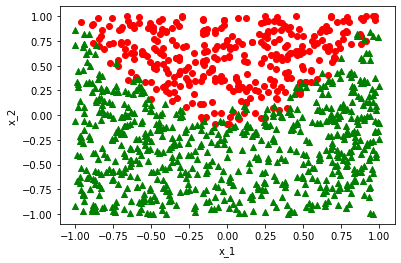

In [4]:
import matplotlib.pyplot as plt
df_p = df.loc[df['Y'] == 1]
df_n = df.loc[df['Y'] == -1]
X1_p = df_p.iloc[:,0]
X2_p = df_p.iloc[:,1]
X1_n = df_n.iloc[:,0]
X2_n = df_n.iloc[:,1]
plt.scatter(X1_p,X2_p,c='r',marker='o')
plt.scatter(X1_n,X2_n,c='g',marker='^')
plt.xlabel('x_1')
plt.ylabel('x_2')

### (a)(ii)

In [5]:
import numpy as np
from sklearn.linear_model import LogisticRegression
X1_train = df.iloc[:,0]
X2_train = df.iloc[:,1]
X_train = np.column_stack((X1_train,X2_train))
y_train = df.iloc[:,2]
lr=LogisticRegression()
lr.fit(X_train,y_train)
coef_LR = lr.coef_.ravel()
# show the parameter value of the trained model
coef_LR

array([-0.01746247,  5.27709681])

In [6]:
# the intercept of the decision boundary
inter = lr.intercept_
inter

array([-1.71620425])

### (a)(iii)

In [7]:
X1_test = X1_train
X2_test = X2_train
X_test = X_train
predictions=lr.predict(X_test)
print(predictions)

[-1 -1 -1  1 -1 -1 -1  1 -1  1  1 -1  1  1  1  1  1 -1  1  1  1  1 -1 -1
  1 -1  1 -1  1 -1 -1  1  1 -1  1  1 -1 -1 -1 -1  1 -1  1 -1  1 -1  1 -1
  1  1 -1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1
 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1 -1  1 -1 -1  1  1  1 -1 -1 -1 -1 -1  1 -1  1 -1 -1  1 -1
  1  1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1 -1  1
 -1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1 -1 -1
  1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1 -1 -1 -1  1 -1
 -1 -1  1  1 -1 -1 -1  1 -1  1 -1  1  1  1 -1 -1 -1  1 -1  1 -1  1 -1 -1
 -1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
 -1 -1  1 -1  1  1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
 -1 -1  1  1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1  1 -1 -1  1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1
 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1

In [8]:
df_lr_t = df
# predicted target values
df_lr_t['Y'] = predictions
df_lr_t

,X1,X2,Y
0,-0.76,-0.57,-1
1,-0.38,-0.52,-1
2,0.32,-0.66,-1
3,0.87,0.36,1
4,-0.63,-0.87,-1
...,...,...,...
994,-0.16,0.97,1
995,0.30,-0.88,-1
996,0.08,-0.88,-1
997,0.85,0.82,1


In [9]:
# preprocessing of predictions
df_lr_t_p = df_lr_t.loc[df['Y'] == 1]
df_lr_t_n = df_lr_t.loc[df['Y'] == -1]
X1_lr_t_p = df_lr_t_p.iloc[:,0]
X2_lr_t_p = df_lr_t_p.iloc[:,1]
X1_lr_t_n = df_lr_t_n.iloc[:,0]
X2_lr_t_n = df_lr_t_n.iloc[:,1]

decision boundary function: inter + coef_LR[0] * x1 + coef_LR[1] * x2 = 0

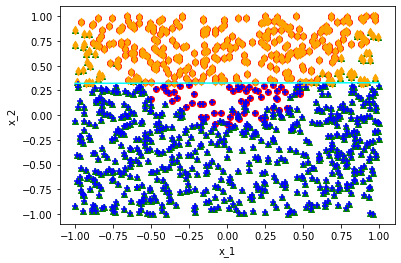

In [10]:
def x2(x1,inter,coef_1,coef_2):
    return (-inter-coef_1 * x1)/coef_2
x1_plot = np.linspace(-1,1,1000)
x2_plot = x2(x1_plot,inter,coef_LR[0],coef_LR[1])
# training data
plt.scatter(X1_p,X2_p,c='r',marker='o')
plt.scatter(X1_n,X2_n,c='g',marker='^')
# predictions
plt.scatter(X1_lr_t_p,X2_lr_t_p,c='orange',marker='d')
plt.scatter(X1_lr_t_n,X2_lr_t_n,c='blue',marker='+')

plt.xlabel('x_1')
plt.ylabel('x_2')
# bule line is the decision boundary
plt.plot(x1_plot,x2_plot,color='cyan')
plt.show()

### (a)(iv)

The cyan line is the decision boundary.The orange diamond dots have predicted value '1' while the blue '+' dots have predicted value '-1'.
The red circle dots have predicted value '1' while the green triangle dots have predicted value '-1'.
We can see that some positive dots are mistaken for negative ones and vice versa.We can conclude that linear model is not so suitable for 
logistic regression duty.

## (b)

### (b)(i)

In [11]:
from sklearn.svm import LinearSVC
# C = 0.001
ls_1 = LinearSVC(C=0.001)
ls_1.fit(X_train,y_train)
coef_list_1 = []
# append the coefficients
coef_ls_1 = ls_1.coef_.ravel()
coef_list_1.append(coef_ls_1)
# append the intercept
intercept_1 = ls_1.intercept_
coef_list_1.append(intercept_1)
coef_list_1

[array([0.00520924, 0.52566816]), array([-0.22814467])]

In [12]:
# C = 1
ls_2 = LinearSVC(C=1)
ls_2.fit(X_train,y_train)
coef_list_2 = []
# append the coefficients
coef_ls_2 = ls_2.coef_.ravel()
coef_list_2.append(coef_ls_2)
# append the intercept
intercept_2 = ls_2.intercept_
coef_list_2.append(intercept_2)
coef_list_2

[array([0.08452159, 6.87234211]), array([-2.15420736])]

In [13]:
# C = 1000
ls_3 = LinearSVC(C=1000)
ls_3.fit(X_train,y_train)
coef_list_3 = []
# append the coefficients
coef_ls_3 = ls_3.coef_.ravel()
coef_list_3.append(coef_ls_3)
# append the intercept
intercept_3 = ls_3.intercept_
coef_list_3.append(intercept_3)
coef_list_3

D:\AI\Software\ANACONDA-202007\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[array([-0.09368955, 51.6537846 ]), array([-16.25684113])]

While C is equal to 1000, it fails to converge

### (b)(ii)

#### C = 0.001

In [14]:
# C = 0.001
predictions=ls_1.predict(X_test)
print(predictions)

[-1 -1 -1 -1 -1 -1 -1  1 -1  1  1 -1  1  1  1  1 -1 -1  1 -1  1  1 -1 -1
  1 -1  1 -1  1 -1 -1  1  1 -1  1  1 -1 -1 -1 -1  1 -1  1 -1  1 -1  1 -1
  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1 -1  1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1
 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1 -1  1
 -1 -1 -1  1 -1  1  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1 -1 -1
  1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
 -1 -1  1  1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1
 -1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1 -1  1 -1 -1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
 -1 -1  1 -1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1  1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1
 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1

In [15]:
df_ls_t = df
# predicted target values
df_ls_t['Y'] = predictions
df_ls_t

,X1,X2,Y
0,-0.76,-0.57,-1
1,-0.38,-0.52,-1
2,0.32,-0.66,-1
3,0.87,0.36,-1
4,-0.63,-0.87,-1
...,...,...,...
994,-0.16,0.97,1
995,0.30,-0.88,-1
996,0.08,-0.88,-1
997,0.85,0.82,1


In [16]:
# preprocessing of predictions
df_ls_t_p = df_ls_t.loc[df['Y'] == 1]
df_ls_t_n = df_ls_t.loc[df['Y'] == -1]
X1_ls_t_p = df_ls_t_p.iloc[:,0]
X2_ls_t_p = df_ls_t_p.iloc[:,1]
X1_ls_t_n = df_ls_t_n.iloc[:,0]
X2_ls_t_n = df_ls_t_n.iloc[:,1]

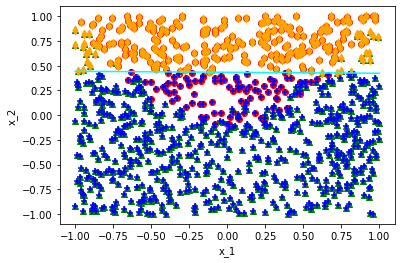

In [17]:
x1_plot = np.linspace(-1,1,1000)
x2_plot = x2(x1_plot,intercept_1,coef_ls_1[0],coef_ls_1[1])
# training data
plt.scatter(X1_p,X2_p,c='r',marker='o')
plt.scatter(X1_n,X2_n,c='g',marker='^')
# predictions
plt.scatter(X1_ls_t_p,X2_ls_t_p,c='orange',marker='d')
plt.scatter(X1_ls_t_n,X2_ls_t_n,c='blue',marker='+')

plt.xlabel('x_1')
plt.ylabel('x_2')
# cyan line is the decision boundary
plt.plot(x1_plot,x2_plot,color='cyan')
plt.show()

#### C = 1

In [18]:
# C = 1
predictions=ls_2.predict(X_test)
print(predictions)

[-1 -1 -1  1 -1 -1 -1  1 -1  1  1 -1  1  1  1  1  1 -1  1  1  1  1 -1 -1
  1 -1  1 -1  1 -1 -1  1  1 -1  1  1 -1 -1 -1 -1  1 -1  1 -1  1 -1  1 -1
  1  1 -1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1
 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1 -1  1 -1 -1  1  1  1 -1 -1 -1 -1 -1  1 -1  1 -1 -1  1 -1
  1  1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1 -1  1
 -1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1 -1 -1
  1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1 -1 -1 -1  1 -1
 -1 -1  1  1 -1 -1 -1  1 -1  1 -1  1  1  1 -1 -1 -1  1 -1  1  1  1 -1 -1
 -1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
 -1 -1  1 -1  1  1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
 -1 -1  1  1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1  1 -1 -1  1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1
 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1

In [19]:
df_ls_t = df
# predicted target values
df_ls_t['Y'] = predictions
df_ls_t

,X1,X2,Y
0,-0.76,-0.57,-1
1,-0.38,-0.52,-1
2,0.32,-0.66,-1
3,0.87,0.36,1
4,-0.63,-0.87,-1
...,...,...,...
994,-0.16,0.97,1
995,0.30,-0.88,-1
996,0.08,-0.88,-1
997,0.85,0.82,1


In [20]:
# preprocessing of predictions
df_ls_t_p = df_ls_t.loc[df['Y'] == 1]
df_ls_t_n = df_ls_t.loc[df['Y'] == -1]
X1_ls_t_p = df_ls_t_p.iloc[:,0]
X2_ls_t_p = df_ls_t_p.iloc[:,1]
X1_ls_t_n = df_ls_t_n.iloc[:,0]
X2_ls_t_n = df_ls_t_n.iloc[:,1]

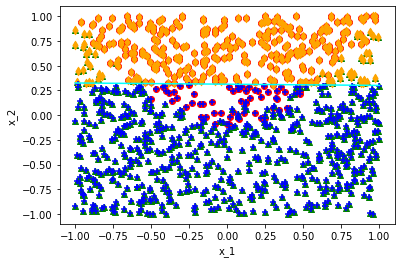

In [21]:
x1_plot = np.linspace(-1,1,1000)
x2_plot = x2(x1_plot,intercept_2,coef_ls_2[0],coef_ls_2[1])
# training data
plt.scatter(X1_p,X2_p,c='r',marker='o')
plt.scatter(X1_n,X2_n,c='g',marker='^')
# predictions
plt.scatter(X1_ls_t_p,X2_ls_t_p,c='orange',marker='d')
plt.scatter(X1_ls_t_n,X2_ls_t_n,c='blue',marker='+')

plt.xlabel('x_1')
plt.ylabel('x_2')
# cyan line is the decision boundary
plt.plot(x1_plot,x2_plot,color='cyan')
plt.show()

#### C = 1000

In [22]:
# C = 1000
predictions=ls_3.predict(X_test)
print(predictions)

[-1 -1 -1  1 -1 -1 -1  1 -1  1  1 -1  1  1  1  1  1 -1  1  1  1  1 -1 -1
  1 -1  1 -1  1 -1 -1  1  1 -1  1  1 -1 -1 -1 -1  1 -1  1 -1  1 -1  1 -1
  1  1 -1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1
 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1 -1  1 -1 -1  1  1  1 -1 -1 -1 -1 -1  1 -1  1 -1 -1  1 -1
  1  1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1 -1  1
 -1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1 -1 -1
  1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1 -1 -1 -1  1 -1
 -1 -1  1  1 -1 -1 -1  1 -1  1 -1  1  1  1 -1 -1 -1  1 -1  1  1  1 -1 -1
 -1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
 -1 -1  1 -1  1  1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
 -1 -1  1  1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1  1 -1 -1  1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1
 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1

In [23]:
df_ls_t = df
# predicted target values
df_ls_t['Y'] = predictions
df_ls_t

,X1,X2,Y
0,-0.76,-0.57,-1
1,-0.38,-0.52,-1
2,0.32,-0.66,-1
3,0.87,0.36,1
4,-0.63,-0.87,-1
...,...,...,...
994,-0.16,0.97,1
995,0.30,-0.88,-1
996,0.08,-0.88,-1
997,0.85,0.82,1


In [24]:
# preprocessing of predictions
df_ls_t_p = df_ls_t.loc[df['Y'] == 1]
df_ls_t_n = df_ls_t.loc[df['Y'] == -1]
X1_ls_t_p = df_ls_t_p.iloc[:,0]
X2_ls_t_p = df_ls_t_p.iloc[:,1]
X1_ls_t_n = df_ls_t_n.iloc[:,0]
X2_ls_t_n = df_ls_t_n.iloc[:,1]

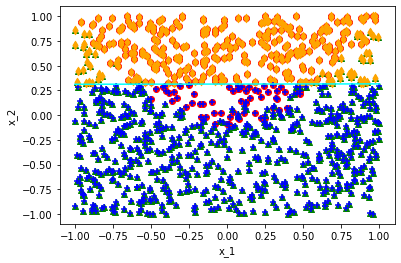

In [25]:
x1_plot = np.linspace(-1,1,1000)
x2_plot = x2(x1_plot,intercept_3,coef_ls_3[0],coef_ls_3[1])
# training data
plt.scatter(X1_p,X2_p,c='r',marker='o')
plt.scatter(X1_n,X2_n,c='g',marker='^')
# predictions
plt.scatter(X1_ls_t_p,X2_ls_t_p,c='orange',marker='d')
plt.scatter(X1_ls_t_n,X2_ls_t_n,c='blue',marker='+')

plt.xlabel('x_1')
plt.ylabel('x_2')
# cyan line is the decision boundary
plt.plot(x1_plot,x2_plot,color='cyan')
plt.show()

### (b)(iii)

Changing C will make model parameters decay and sparser because the model tries to obtain a smaller loss.
As for the impact on the SVM predictions,too small values of the penalty parameter will incur overrfitting while too large values of the penalty parameter will lead to underfitting.

### (c)(i)

In [50]:
# add the square of each feature
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

# def PolynomialLogisticRegression(degree):
#     return Pipeline([
#         ('poly', PolynomialFeatures(degree=degree)),
#         ('std_scaler', StandardScaler()),
#         ('log_reg', LogisticRegression())
#     ])

poly = PolynomialFeatures(degree=2)

X_poly = poly.fit_transform(X_train)

poly_log_reg = LogisticRegression(solver='liblinear')

poly_log_reg.fit(X_poly, y_train)

coef_list = []
# append the coefficients
coef_ls = poly_log_reg.coef_.ravel()
coef_list.append(coef_ls)
# append the intercept
intercept = poly_log_reg.intercept_
coef_list.append(intercept)
coef_list

[array([-1.46407598,  0.05920406,  7.91448853, -0.14140014,  0.12132678,
         3.92483434]),
 array([-1.46407598])]

### (c)(ii)

In [52]:
X_test = X_poly
predictions=poly_log_reg.predict(X_test)
print(predictions)

[-1 -1 -1  1 -1 -1 -1  1 -1  1  1 -1  1  1  1  1  1 -1  1  1  1  1 -1 -1
  1 -1  1 -1  1 -1 -1  1  1 -1  1  1 -1 -1 -1 -1  1 -1  1 -1  1 -1  1 -1
  1  1 -1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1
 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1 -1  1 -1 -1  1  1  1 -1 -1 -1 -1 -1  1 -1  1 -1 -1  1 -1
 -1  1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1 -1  1
 -1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1 -1 -1
  1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1 -1 -1 -1  1 -1
 -1 -1  1  1 -1 -1 -1  1 -1  1 -1  1  1  1 -1 -1 -1  1 -1  1  1  1 -1 -1
 -1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
 -1 -1  1 -1  1  1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
 -1 -1  1  1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1  1 -1 -1  1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1
 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1

In [53]:
df_poly_t = df
# predicted target values
df_poly_t['Y'] = predictions
df_poly_t

,X1,X2,Y
0,-0.76,-0.57,-1
1,-0.38,-0.52,-1
2,0.32,-0.66,-1
3,0.87,0.36,1
4,-0.63,-0.87,-1
...,...,...,...
994,-0.16,0.97,1
995,0.30,-0.88,-1
996,0.08,-0.88,-1
997,0.85,0.82,1


In [54]:
# preprocessing of predictions
df_poly_t_p = df_poly_t.loc[df['Y'] == 1]
df_poly_t_n = df_poly_t.loc[df['Y'] == -1]
X1_poly_t_p = df_poly_t_p.iloc[:,0]
X2_poly_t_p = df_poly_t_p.iloc[:,1]
X1_poly_t_n = df_poly_t_n.iloc[:,0]
X2_poly_t_n = df_poly_t_n.iloc[:,1]

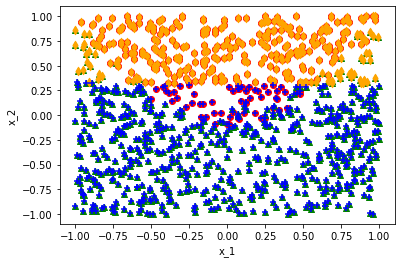

In [61]:
# training data
plt.scatter(X1_p,X2_p,c='r',marker='o')
plt.scatter(X1_n,X2_n,c='g',marker='^')
# predictions
plt.scatter(X1_poly_t_p,X2_poly_t_p,c='orange',marker='d')
plt.scatter(X1_poly_t_n,X2_poly_t_n,c='blue',marker='+')

plt.xlabel('x_1')
plt.ylabel('x_2')

plt.show()

### c(iii)

Comparing to the performance of a reasonable baseline predictor,such as sklearn.pipeline.Pipeline,this classifier can perform the same well.